### Lets import the necessary libraries

In [1]:
import math, time, random, datetime 

In [2]:
### Libraries for data manipulation 

import pandas as pd
import numpy as np

In [3]:
### Libraries for Data Visualization and to gain meaningful Data Insights

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### I am very good at ignoring warnings ;)

import warnings
warnings.filterwarnings('ignore')

### Lets start with these libraries for EDA and later we will import libraries required for model building :)

In [5]:
#### Lets import the train & test data to check all the features/columns 

train = pd.read_csv('train (1).csv')
test = pd.read_csv('test.csv')

#### Also, let us have a look into the submission format for the competition

gender_submission = pd.read_csv('gender_submission.csv')

In [6]:
train.head()  # .head() function allow us to view the top 5 records of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### One important thing to notice from 'Train' & 'Test' dataset is that 'Survived' is the dependent feature that we need to predict and the rest of the features are independent.

In [8]:
### Lets check the shape of the dataset 

print(train.shape) # .shape is an attribute / property of the dataset not a function.
print(test.shape) 

### Output will be in the format of (rows,columns) / "(records,features)[In a so called sophisticated way]"

(891, 12)
(418, 11)


In [9]:
### let us have a view on the submission format of the competition.

gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


#### This means we need to format our predictions with respect to 'PassengerId'(unique to every person boarded the ship) and 'Survived' columns(which is the dependent feature)

## Lets explore the data for Data Insights or in simple terms Exploratory Data Analyis (E.D.A.)

### We will use visualization libraries to gain meaningful insights

In [10]:
#### So, the first thing you should always do is try to look for the amount of null values present in your dataset.

train.isnull().sum()

### .isnull() is used to know the null values in each column in the dataset
### .sum() is used for the summation of all the null values in each column of the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

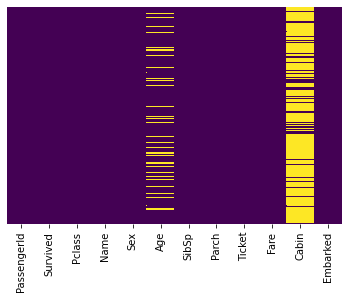

In [11]:
# Lets plot the above data in a visualization form using visualization libraries that we have earlier imported.

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap ='viridis') 

### 'sns' is the alias that we have used for the seaborn library( you can literally use your name for alias for any libraries you import, but lets go with the standard procedure) and heatmap is an inbuilt function of the library for Data Visualization purpose 

#### you can use this link 'https://seaborn.pydata.org/' to know more about the library.

### One more important thing that I have forget to mention is that go through the kaggle course if you are a beginner.

### Also Just sign in 'simplilearn.com' for "Data Science with Python course" its free for first 90 days, Its really good.

### If you like the content in the notebook do UPVOTE, as I am also a beginner and is making a Career Transition.

### IF YOU WANT TO LEARN TOGETHER, YOU CAN ALSO CONNECT ME ON LINKEDIN, YOU CAN FIND MY ID IN MY KAGGLE PROFILE.

0    549
1    342
Name: Survived, dtype: int64


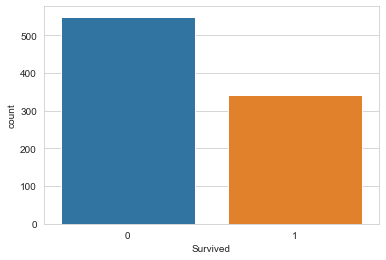

In [12]:
# Lets check how many people survived the Titanic Disaster 

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

print(train.Survived.value_counts()) #.value_counts() is used to count the records in features/columns

#### We can clearly see that 342 people survived the disaster and 549 people not able to survived.

3    491
1    216
2    184
Name: Pclass, dtype: int64


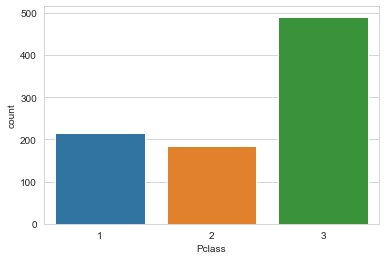

In [13]:
# Lets check the Pclass (Passenger Class) of the people who boarded the ship

sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=train)

print(train.Pclass.value_counts())

#### We can cleary say that max. no. of passengers are from Pclass-3, followed by Pclass-1 and Pclass-2

<AxesSubplot:xlabel='Survived', ylabel='count'>

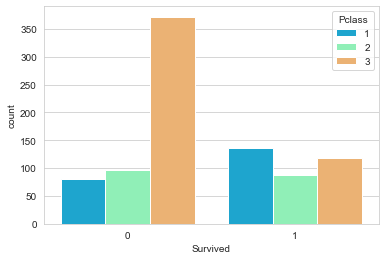

In [14]:
# Lets check the Survived feature with respect to the Pclass to find any realtion between the two

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

#### we can come to the conclusion that 'Among the Survived people, max. are from Pclass-1' and 'Among the people who had not survived, max. are from Pclass-3'

male      577
female    314
Name: Sex, dtype: int64


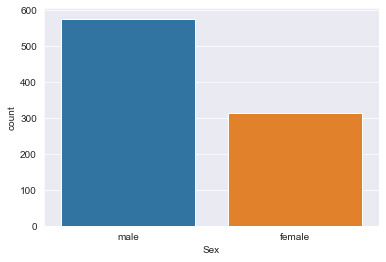

In [15]:
# Now let us have a look in the number of male and female who boarded the ship.

sns.set_style('darkgrid')
sns.countplot(x='Sex',data=train)

print(train.Sex.value_counts())

#### We can say that max. number of passengers are male

<AxesSubplot:xlabel='Survived', ylabel='count'>

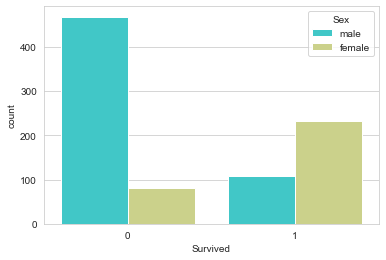

In [16]:
# Lets check the Survived feature with respect to the Sex feature to find any realtion between the two

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

#### We can clearly conclude that among people who survived the disaster, max. were female gender

In [17]:
# Lets check the Age feature 
pd.set_option('display.max_rows',88) # pandas function to display all rows
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
35.00    18
32.00    18
27.00    18
26.00    18
16.00    17
31.00    17
33.00    15
34.00    15
23.00    15
20.00    15
39.00    14
42.00    13
40.00    13
17.00    13
45.00    12
38.00    11
4.00     10
2.00     10
50.00    10
47.00     9
48.00     9
44.00     9
9.00      8
54.00     8
51.00     7
1.00      7
14.00     6
3.00      6
41.00     6
37.00     6
52.00     6
49.00     6
15.00     5
43.00     5
58.00     5
8.00      4
60.00     4
11.00     4
56.00     4
5.00      4
62.00     4
65.00     3
7.00      3
61.00     3
46.00     3
6.00      3
40.50     2
10.00     2
0.75      2
30.50     2
64.00     2
32.50     2
0.83      2
59.00     2
70.00     2
63.00     2
28.50     2
71.00     2
13.00     2
57.00     2
55.00     2
45.50     2
24.50     1
66.00     1
20.50     1
0.67      1
80.00     1
14.50     1
34.50     1
23.50     1
53.00     1
36.50     1
0.42      1
55.5

In [18]:
# Also lets have a look on the null values present
train.Age.isnull().sum()

177

#### So, there are 177 records where the Age data is missing

<AxesSubplot:xlabel='Age', ylabel='Count'>

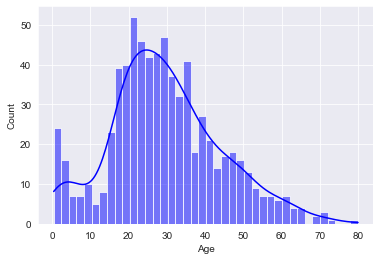

In [19]:
# Lets check the distribution of the Age Data by plotting a histogram 

sns.set_style('darkgrid')
sns.histplot(train['Age'].dropna(),bins=40,color='blue',kde=True)


<AxesSubplot:>

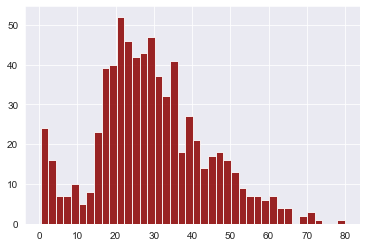

In [20]:
# You can also do the same with the matplotlib library

train['Age'].hist(bins=40,color='darkred',alpha=0.85)

#### we can cleary see that among the Age data available to us, max. passengers who boarded the ship is between (20-40) years age bracket.

In [21]:
# Lets know our data in dataset in a statistical way and terms

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Also lets have a look in their datatypes that will help us later in data cleaning/feature engineering

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

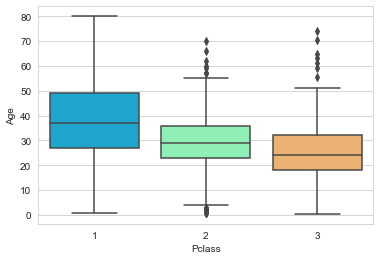

In [23]:
# Lets check if there is any relation of Pclass with respect to Age feature so that we can derive a condition to replace the missing values in the Age data records
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


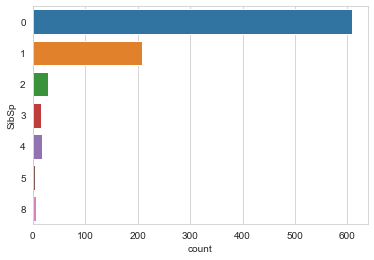

In [24]:
# Lets check the 'Sibsp' feature i.e (Siblings+spouse)

sns.set_style('whitegrid')
sns.countplot(y='SibSp',data=train)

print(train.SibSp.value_counts())

#### we can say that max. no. of passengers didn't have a siblings and spouse

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


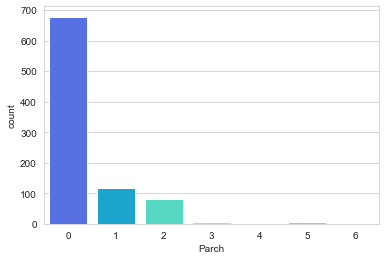

In [25]:
# Lets have a look on Parch (The number of parents/children the passenger boarded the ship) feature

sns.set_style('whitegrid')
sns.countplot(x='Parch',data=train,palette='rainbow')

print(train.Parch.value_counts())

#### We can say that max. no. of passengers didn't have parents/children aboarded with them.

In [26]:
#  lets check the ticket column to gain insights

train.Ticket.value_counts()

CA. 2343      7
1601          7
347082        7
CA 2144       6
3101295       6
             ..
C.A. 18723    1
2623          1
36963         1
SO/C 14885    1
349912        1
Name: Ticket, Length: 681, dtype: int64

In [27]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

#### List of all the unique tickets

In [28]:
# Lets have a look in the Fare feature

print(len(train.Fare.unique()))
print(train.Fare.isnull().sum())

248
0


#### There are 248 unique fare recorded in the dataset 

In [29]:
# Lets now check the Cabin Feature for the datset

train.Cabin.isnull().sum()

687

#### So, there are 687 missing records in the Cabin feature, so during model building we will drop the column since max. values are missing and there is no way we can impute or find relation or know about these missing values

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Embarked'>

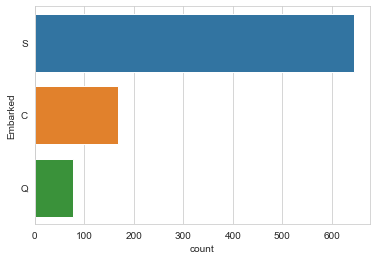

In [30]:
# Lets check the last column in our dataset i.e. Embarked (meaning from which place passengers boarded the ship)

print(train.Embarked.value_counts())

sns.countplot(y='Embarked', data=train)

In [31]:
train['Age'] = train['Age'].fillna(train['Age'].median())

<AxesSubplot:>

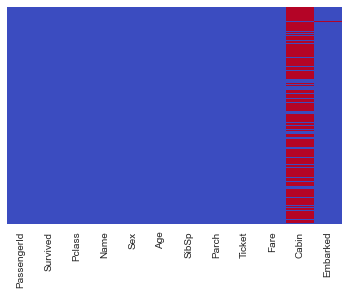

In [32]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap= 'coolwarm')

In [33]:
train = train.drop('Cabin', axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [36]:
# If you want you can drop the 2 records from the Embarked column, but instead of dropping I will replace it with most frequent occuring category.

train['Embarked']= train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

In [37]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### So, we are done with our train data, now we will split our data and build our ML model to train the dataset

In [38]:
features= [ 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'] # I have picked the independent features inside a list

##Let's devide the dataset

X = train[features]
y = train['Survived']

In [39]:
X.isnull().sum() ### Double check to make sure there is no null values in your training dataset

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### We have cleaned our dataset, now we will use Data Preprocessing techniques or Feature Engineering to deal with Categorical Variables.

In [40]:
# Now let's enocde categorical values (Feature Engineering Techniques) 

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X['Sex'] = LE.fit_transform(X['Sex'])
X['Embarked'] = LE.fit_transform(X['Embarked'])


## Now, we will split the dataset into training and validation format (For better understanding of what I'm saying go through the "Intro to Machine Learning" course from kaggle, its free and very good to get the foundation right :)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =0)

### Fitting a ML model, to be more specific I will be using XGBoost

In [42]:
%%time
from xgboost import XGBClassifier
classifier = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=420,
                        learning_rate = 0.01)
eval_set = [(X_train,y_train), (X_test,y_test)]
classifier.fit(X_train, y_train.values.ravel(), early_stopping_rounds=12, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
classifier.score(X_test,y_test)

<IPython.core.display.Javascript object>

[0]	validation_0-error:0.19583	validation_0-logloss:0.68841	validation_1-error:0.20149	validation_1-logloss:0.68833
[1]	validation_0-error:0.17336	validation_0-logloss:0.68402	validation_1-error:0.17164	validation_1-logloss:0.68386
[2]	validation_0-error:0.16533	validation_0-logloss:0.67981	validation_1-error:0.18284	validation_1-logloss:0.67980
[3]	validation_0-error:0.16051	validation_0-logloss:0.67621	validation_1-error:0.18284	validation_1-logloss:0.67675
[4]	validation_0-error:0.16212	validation_0-logloss:0.67188	validation_1-error:0.18284	validation_1-logloss:0.67266
[5]	validation_0-error:0.15891	validation_0-logloss:0.66759	validation_1-error:0.19403	validation_1-logloss:0.66848
[6]	validation_0-error:0.15409	validation_0-logloss:0.66330	validation_1-error:0.17910	validation_1-logloss:0.66431
[7]	validation_0-error:0.14928	validation_0-logloss:0.65934	validation_1-error:0.18284	validation_1-logloss:0.66043
[8]	validation_0-error:0.14928	validation_0-logloss:0.65555	validation_1

[71]	validation_0-error:0.15249	validation_0-logloss:0.49906	validation_1-error:0.17910	validation_1-logloss:0.50933
[72]	validation_0-error:0.15409	validation_0-logloss:0.49741	validation_1-error:0.18657	validation_1-logloss:0.50748
[73]	validation_0-error:0.14767	validation_0-logloss:0.49563	validation_1-error:0.18657	validation_1-logloss:0.50599
[74]	validation_0-error:0.14607	validation_0-logloss:0.49406	validation_1-error:0.19030	validation_1-logloss:0.50475
[75]	validation_0-error:0.14767	validation_0-logloss:0.49282	validation_1-error:0.18284	validation_1-logloss:0.50374
[76]	validation_0-error:0.14928	validation_0-logloss:0.49138	validation_1-error:0.18284	validation_1-logloss:0.50246
[77]	validation_0-error:0.14767	validation_0-logloss:0.48998	validation_1-error:0.18284	validation_1-logloss:0.50131
[78]	validation_0-error:0.14928	validation_0-logloss:0.48862	validation_1-error:0.18657	validation_1-logloss:0.50023
[79]	validation_0-error:0.14928	validation_0-logloss:0.48712	val

[141]	validation_0-error:0.14607	validation_0-logloss:0.42178	validation_1-error:0.17910	validation_1-logloss:0.44401
[142]	validation_0-error:0.14286	validation_0-logloss:0.42096	validation_1-error:0.17910	validation_1-logloss:0.44365
[143]	validation_0-error:0.14607	validation_0-logloss:0.42020	validation_1-error:0.17910	validation_1-logloss:0.44299
[144]	validation_0-error:0.14607	validation_0-logloss:0.41930	validation_1-error:0.17910	validation_1-logloss:0.44234
[145]	validation_0-error:0.14446	validation_0-logloss:0.41845	validation_1-error:0.17910	validation_1-logloss:0.44170
[146]	validation_0-error:0.14446	validation_0-logloss:0.41781	validation_1-error:0.18284	validation_1-logloss:0.44139
[147]	validation_0-error:0.14446	validation_0-logloss:0.41690	validation_1-error:0.17910	validation_1-logloss:0.44086
[148]	validation_0-error:0.14125	validation_0-logloss:0.41617	validation_1-error:0.18284	validation_1-logloss:0.44076
[149]	validation_0-error:0.14125	validation_0-logloss:0.

[211]	validation_0-error:0.13323	validation_0-logloss:0.37901	validation_1-error:0.17164	validation_1-logloss:0.41581
[212]	validation_0-error:0.13002	validation_0-logloss:0.37840	validation_1-error:0.17164	validation_1-logloss:0.41548
[213]	validation_0-error:0.13002	validation_0-logloss:0.37807	validation_1-error:0.17164	validation_1-logloss:0.41528
[214]	validation_0-error:0.13002	validation_0-logloss:0.37762	validation_1-error:0.17537	validation_1-logloss:0.41528
[215]	validation_0-error:0.13162	validation_0-logloss:0.37707	validation_1-error:0.17537	validation_1-logloss:0.41493
[216]	validation_0-error:0.13162	validation_0-logloss:0.37662	validation_1-error:0.17537	validation_1-logloss:0.41465
[217]	validation_0-error:0.13162	validation_0-logloss:0.37629	validation_1-error:0.17537	validation_1-logloss:0.41431
[218]	validation_0-error:0.13162	validation_0-logloss:0.37577	validation_1-error:0.17537	validation_1-logloss:0.41402
[219]	validation_0-error:0.13323	validation_0-logloss:0.

[281]	validation_0-error:0.12681	validation_0-logloss:0.35133	validation_1-error:0.16791	validation_1-logloss:0.40308
[282]	validation_0-error:0.12681	validation_0-logloss:0.35100	validation_1-error:0.16791	validation_1-logloss:0.40281
[283]	validation_0-error:0.12681	validation_0-logloss:0.35066	validation_1-error:0.16791	validation_1-logloss:0.40274
[284]	validation_0-error:0.12681	validation_0-logloss:0.35036	validation_1-error:0.16791	validation_1-logloss:0.40273
[285]	validation_0-error:0.12681	validation_0-logloss:0.35004	validation_1-error:0.16791	validation_1-logloss:0.40270
[286]	validation_0-error:0.12681	validation_0-logloss:0.34968	validation_1-error:0.16791	validation_1-logloss:0.40268
[287]	validation_0-error:0.12681	validation_0-logloss:0.34930	validation_1-error:0.16418	validation_1-logloss:0.40220
[288]	validation_0-error:0.12681	validation_0-logloss:0.34891	validation_1-error:0.16791	validation_1-logloss:0.40230
[289]	validation_0-error:0.12681	validation_0-logloss:0.

[351]	validation_0-error:0.12681	validation_0-logloss:0.33260	validation_1-error:0.16418	validation_1-logloss:0.39580
[352]	validation_0-error:0.12520	validation_0-logloss:0.33235	validation_1-error:0.16418	validation_1-logloss:0.39569
[353]	validation_0-error:0.12360	validation_0-logloss:0.33213	validation_1-error:0.16418	validation_1-logloss:0.39552
[354]	validation_0-error:0.12520	validation_0-logloss:0.33194	validation_1-error:0.16418	validation_1-logloss:0.39553
[355]	validation_0-error:0.12520	validation_0-logloss:0.33174	validation_1-error:0.16418	validation_1-logloss:0.39543
[356]	validation_0-error:0.12681	validation_0-logloss:0.33149	validation_1-error:0.16418	validation_1-logloss:0.39517
[357]	validation_0-error:0.12681	validation_0-logloss:0.33133	validation_1-error:0.16418	validation_1-logloss:0.39504
[358]	validation_0-error:0.12520	validation_0-logloss:0.33113	validation_1-error:0.16418	validation_1-logloss:0.39501
[359]	validation_0-error:0.12520	validation_0-logloss:0.

0.8507462686567164

In [43]:
classifier.score(X_test,y_test)

0.8507462686567164

### Lets import the test dataset for the competition

In [44]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
# Check the null values for the test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
#Imputing the null values in the test dataset

test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [48]:
test_data = test[features] # This helps us to drop the Cabin column instead of writing a code as we have already describe features as a list in our notebook, containing only the independent features.
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Now we will use Encoding technique to encode categorical variables in column 'Sex' & 'Embarked'

In [49]:
test_data['Sex'] = LE.fit_transform(test_data['Sex'])
test_data['Embarked'] = LE.fit_transform(test_data['Embarked'])

In [50]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


## Finally, we reached the moment of glory! we will now predict the values in our test data

In [51]:
prediction = classifier.predict(test_data)

In [52]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
predictions = pd.DataFrame(prediction) # storing the prediction in a pandas DataFrame

In [54]:
gender_submission = pd.read_csv('gender_submission.csv')

In [55]:
datasets = pd.concat(([gender_submission['PassengerId'],predictions]),axis=1)

In [56]:
# creating the submission file
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False) 